In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### I/O Distribution

In [2]:
beforeBench = pd.read_csv('./max/BB.csv')
afterBench = pd.read_csv('./max/AB.csv')

preBench = pd.merge(afterBench, beforeBench, on='lpn', suffixes=('After', 'Before'))
preBench['accessCount'] = preBench['accessCountAfter'] - preBench['accessCountBefore']
preBench = preBench.loc[preBench['accessCount'] > 0]

preBench = preBench.drop(columns=['accessCountAfter', 'accessCountBefore'])
preBench.to_csv('./max/AC.csv', index=False)

bench = pd.read_csv('./max/AC.csv')

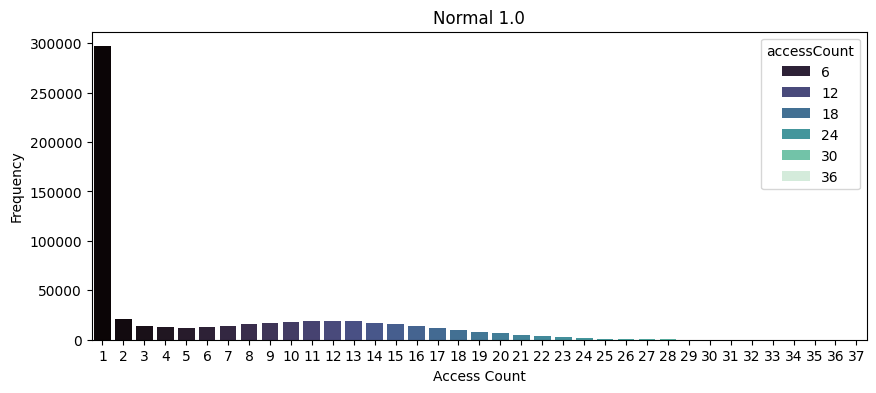

In [3]:
plt.figure(figsize=(10, 4))

plt.title('Normal 1.0')
plt.xlabel('Access Count')
plt.ylabel('Frequency')

sns.countplot(x='accessCount', data=bench, hue='accessCount', palette='mako')

plt.show()

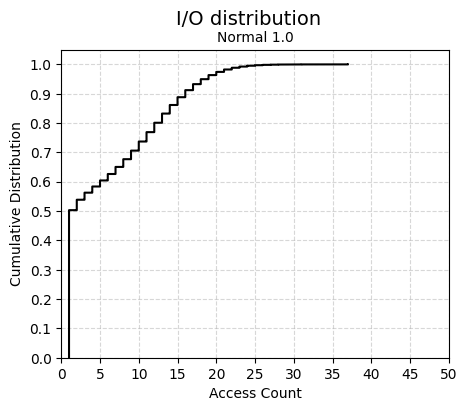

In [4]:
plt.figure(figsize=(5, 4))

plt.suptitle('I/O distribution', fontsize=14)
plt.title('Normal 1.0', fontsize=10)
plt.xlabel('Access Count')
plt.ylabel('Cumulative Distribution')

plt.xlim(min(bench['accessCount']), 50)
plt.ylim(0.0, 1.05)
plt.xticks(range(min(bench['accessCount'] - 1), 55, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.5)

sns.ecdfplot(bench['accessCount'], color ='black')
plt.savefig("AC.png")

plt.show()

### IOPS

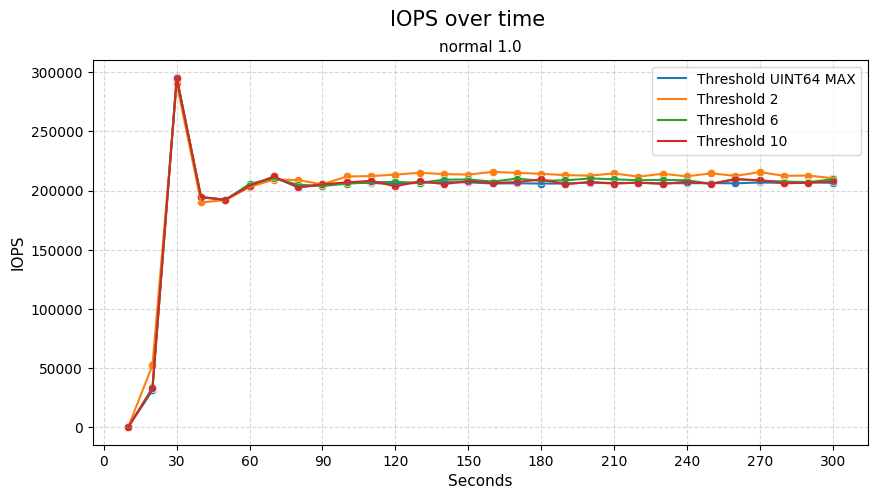

Threshold UINT64 MAX : 195758.83333
Threshold 2 : 201124.36667
Threshold 6 : 197164.43333
Threshold 10 : 196187.70000


In [5]:
IOPSMAX = pd.read_csv('./max/IOPS.csv')
IOPSMAX['time'] = range(1, len(IOPSMAX) + 1, 1)
IOPSMAX['time'] = 10 * IOPSMAX['time']

IOPS2 = pd.read_csv('./2/IOPS.csv')
IOPS2['time'] = range(1, len(IOPS2) + 1, 1)
IOPS2['time'] = 10 * IOPS2['time']

IOPS6 = pd.read_csv('./6/IOPS.csv')
IOPS6['time'] = range(1, len(IOPS6) + 1, 1)
IOPS6['time'] = 10 * IOPS6['time']

IOPS10 = pd.read_csv('./10/IOPS.csv')
IOPS10['time'] = range(1, len(IOPS10) + 1, 1)
IOPS10['time'] = 10 * IOPS10['time']

plt.figure(figsize=(10, 5))
plt.suptitle('IOPS over time', fontsize=15)
plt.title('normal 1.0', fontsize=11)
plt.xlabel('Seconds', fontsize=11)
plt.ylabel('IOPS', fontsize=11)

plt.xticks(np.arange(0, 350, 30))
plt.grid(True, linestyle='--', alpha=0.5)

sns.lineplot(x='time', y='iops', data=IOPSMAX, label='Threshold UINT64 MAX')
sns.scatterplot(x="time", y="iops", data=IOPSMAX)

sns.lineplot(x='time', y='iops', data=IOPS2, label='Threshold 2')
sns.scatterplot(x="time", y="iops", data=IOPS2)

sns.lineplot(x='time', y='iops', data=IOPS6, label='Threshold 6')
sns.scatterplot(x="time", y="iops", data=IOPS6)

sns.lineplot(x='time', y='iops', data=IOPS10, label='Threshold 10')
sns.scatterplot(x="time", y="iops", data=IOPS10)

plt.savefig("IOPS.png")
plt.legend()
plt.show()

print(f"Threshold UINT64 MAX : {IOPSMAX['iops'].mean():.5f}")
print(f"Threshold 2 : {IOPS2['iops'].mean():.5f}")
print(f"Threshold 6 : {IOPS6['iops'].mean():.5f}")
print(f"Threshold 10 : {IOPS10['iops'].mean():.5f}")

### WAF

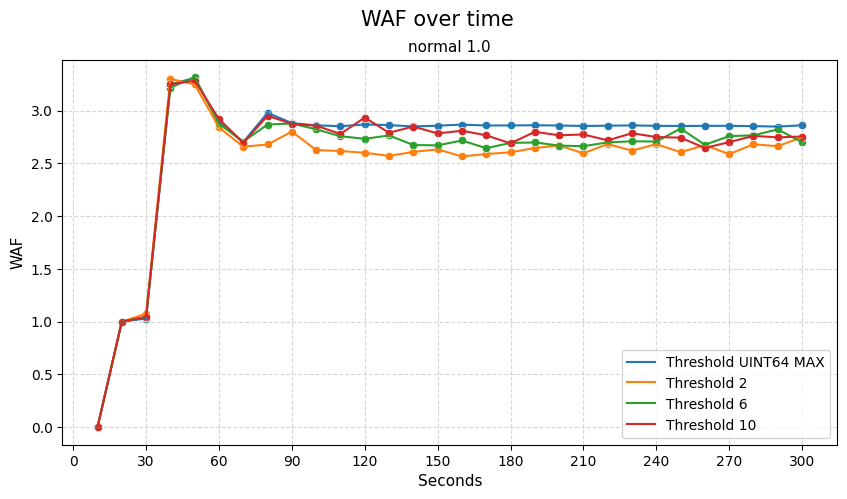

Threshold UINT64 MAX : 2.66846
Threshold 2 : 2.49603
Threshold 6 : 2.56964
Threshold 10 : 2.60756


In [6]:
WAFMAX = pd.read_csv('./max/WAF.csv')
WAFMAX['time'] = range(1, len(WAFMAX) + 1, 1)
WAFMAX['time'] = 10 * WAFMAX['time']

WAF2 = pd.read_csv('./2/WAF.csv')
WAF2['time'] = range(1, len(WAF2) + 1, 1)
WAF2['time'] = 10 * WAF2['time']

WAF6 = pd.read_csv('./6/WAF.csv')
WAF6['time'] = range(1, len(WAF6) + 1, 1)
WAF6['time'] = 10 * WAF6['time']

WAF10 = pd.read_csv('./10/WAF.csv')
WAF10['time'] = range(1, len(WAF10) + 1, 1)
WAF10['time'] = 10 * WAF10['time']

plt.figure(figsize=(10, 5))
plt.suptitle('WAF over time', fontsize=15)
plt.title('normal 1.0', fontsize=11)
plt.xlabel('Seconds', fontsize=11)
plt.ylabel('WAF', fontsize=11)

plt.xticks(np.arange(0, 350, 30))
plt.grid(True, linestyle='--', alpha=0.5)

sns.lineplot(x='time', y='WAF', data=WAFMAX, label='Threshold UINT64 MAX')
sns.scatterplot(x="time", y="WAF", data=WAFMAX)

sns.lineplot(x='time', y='WAF', data=WAF2, label='Threshold 2')
sns.scatterplot(x="time", y="WAF", data=WAF2)

sns.lineplot(x='time', y='WAF', data=WAF6, label='Threshold 6')
sns.scatterplot(x="time", y="WAF", data=WAF6)

sns.lineplot(x='time', y='WAF', data=WAF10, label='Threshold 10')
sns.scatterplot(x="time", y="WAF", data=WAF10)

plt.savefig("WAF.png")
plt.legend()
plt.show()

print(f"Threshold UINT64 MAX : {WAFMAX['WAF'].mean():.5f}")
print(f"Threshold 2 : {WAF2['WAF'].mean():.5f}")
print(f"Threshold 6 : {WAF6['WAF'].mean():.5f}")
print(f"Threshold 10 : {WAF10['WAF'].mean():.5f}")